## Import functions 

In [1]:
import os 
import sys
import numpy as np
#os.chdir(os.path.join("/home/datawork-osmose/",'osmoseNotebooks_v0','source'))

with open('path_codes.txt') as f:
    codes_path = f.readlines()[0]
os.chdir(os.path.join(codes_path))

from apply_model_on_eval_set import load_model_hyperparameters 
from use_network_functions import show_epoch_loss, set_epoch
from launcher_datasetScale import list_datasets
from check_files_in_ai_folders import check_available_ai_tasks_benchmark_modeltrainned
from apply_model_on_new_format_dataset import apply_model_on_new_format_dataset_main, plot_some_example


C:\Users\gabri.DESKTOP-QIPER28\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


#### <span style="color:red">*Select task, benchmark and model to apply*</span>


In [2]:
check_available_ai_tasks_benchmark_modeltrainned()

/
TaskTEST1/
    BMTEST1_1/
        models/
            model1/
            model2/
            model3/
Task_Glider_PBW_AnnotatorAnalysis/
    BM_merged15/
        models/
            m1/
    BM_EXP/
        models/
            m1/
    Comp_BM_curves/
    BM_merged6/
        models/
            m1/
    BM_merged2_2/
        models/
            m1/
    BM_merged2_3/
        models/
            m1/
    BM_merged2_4/
        models/
            m1/
    BM_merged2_5/
        models/
            m1/
    BM_merged2_6/
        models/
            m1/
    BM_merged2_7/
        models/
            m1/
    BM_merged2_8/
        models/
            m1/
    BM_merged8/
        models/
            m1/
    BM_merged10/
        models/
            m1/
    BM_merged12/
        models/
            m1/
    BM_merged14/
        models/
            m1/
    BM_merged2_9/
        models/
            m1/
    BM_merged2_10/
        models/
            m1/
    WeakLabelling_AllAnnotation/
        models/
     

In [110]:
Task_ID_Model = 'Task_Glider_PBW_AnnotatorAnalysis'
BM_Name_Model = 'WeakLabelling_AllAnnotation'
Version_name_Model = 'm1'

## Print Parameters

Nb : mettre ici le choix de l'epoch à conserver !

#### <span style="color:blue">*JUST RUN CELL*</span>

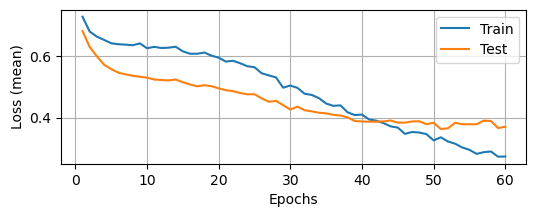

In [111]:
show_epoch_loss(Task_ID_Model, BM_Name_Model, Version_name_Model)

In [113]:
ID_epoch_for_evaluation = 60

set_epoch(Task_ID_Model, BM_Name_Model, Version_name_Model, ID_epoch_for_evaluation)

In [114]:
parameters_Model = load_model_hyperparameters(Task_ID_Model, BM_Name_Model, Version_name_Model)

for item in list(parameters_Model.keys()):
    print(item, ' : ', parameters_Model[item])

TrainsetRatio  :  0.8
batch_size  :  10
learning_rate  :  5e-05
num_epochs  :  60
shuffle  :  True
use_pretrained  :  True
input_data_format  :  spectrogram
nfft  :  [499]
window_size  :  [198]
overlap  :  [50]
dynamic_min  :  [-20]
dynamic_max  :  [20]
scaling  :  ['spectrum']
num_classes  :  1
sample_rate  :  [500]
dataset_ID_tab  :  ['Glider']
Task_ID  :  Task_Glider_PBW_AnnotatorAnalysis
BM_Name  :  WeakLabelling_AllAnnotation
SplitName  :  split_for_eval_1
Version_name  :  m1
ModelName  :  CNN3_FC3


#### <span style="color:red">*Select the task, benchmark, and datasplit to evaluate your model*</span>


In [115]:

Task_ID_Evaluation = 'Task_Glider_PBW_AnnotatorAnalysis'
BM_Name_Evaluation = 'BM_FULL_EVAL_long'
SplitName_Evaluation = 'split_for_eval_1'# 'ALL_DATASET'#'split_for_eval_1'

In [116]:
#check_available_formats(Task_ID, BM_Name)

#### <span style="color:red">*Parameters for model application*</span>

In [117]:
input_data_format = 'spectrogram' #'audio' ou 'spectrogram'
# 'spectrogram' : use already computed spectrogram
# 'audio' : use .wav file, spectrogram will be computed iteratively

nfft = [499]
window_size = [198]
overlap = [50]


#Useless if input_data_format = 'spectrogram'
dynamic_min = [-20]
dynamic_max = [20]
scaling = ['spectrum'] # 'spectrum', 'density'

In [118]:
parameters_Evaluation = {'input_data_format':input_data_format, 'nfft':nfft, 'window_size':window_size, 'overlap':overlap, 'dynamic_min':dynamic_min, 'dynamic_max':dynamic_max, 'scaling':scaling,}

Done


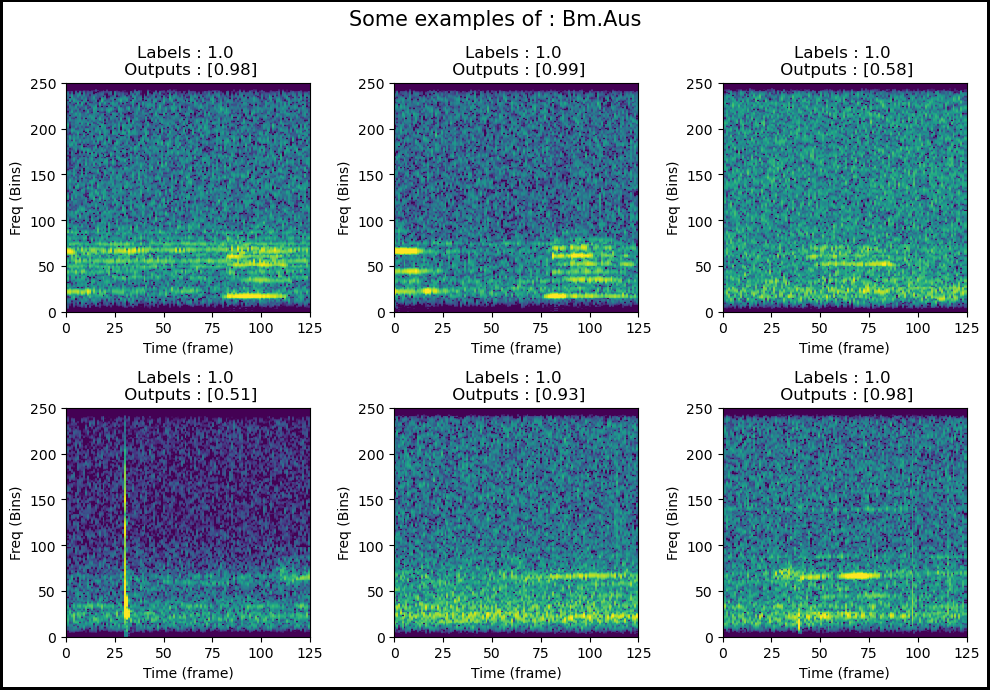

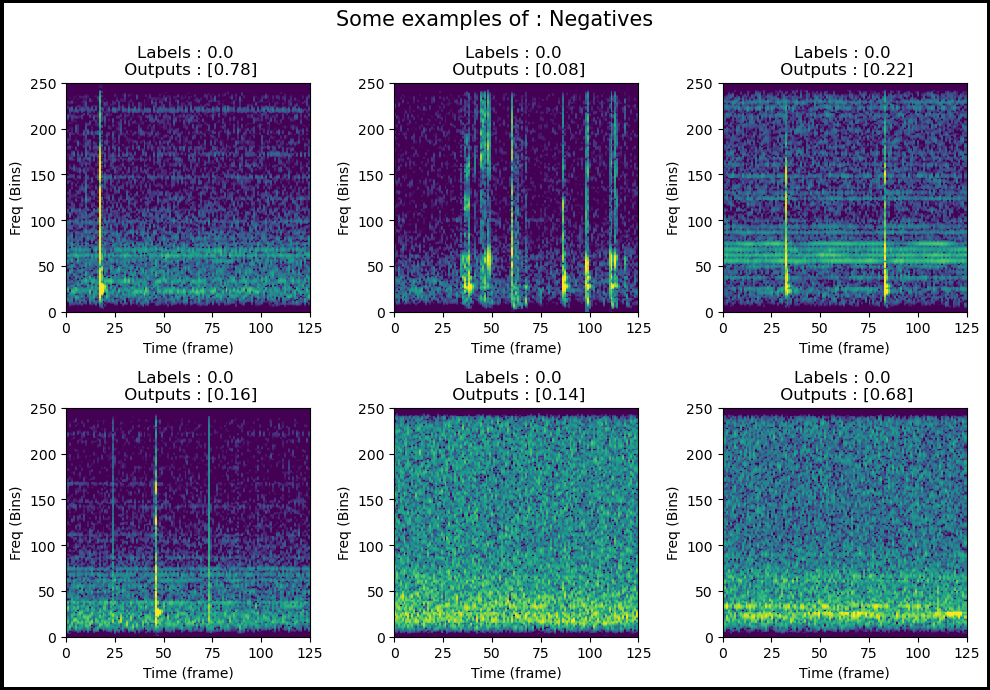

In [119]:
plot_some_example(Task_ID_Model, BM_Name_Model, Version_name_Model, parameters_Model, Task_ID_Evaluation, BM_Name_Evaluation, SplitName_Evaluation, parameters_Evaluation)

In [120]:
LabelsList, labels, outputs, filename = apply_model_on_new_format_dataset_main(Task_ID_Model, BM_Name_Model, Version_name_Model, parameters_Model, Task_ID_Evaluation, BM_Name_Evaluation, SplitName_Evaluation, parameters_Evaluation)

Done
Applying model on evaluation set ...


100%|██████████| 6701/6701 [00:16<00:00, 408.71it/s]


In [121]:
arg_sort = np.argsort(filename)
arg_sort



array([6700, 6699, 6698, ...,    2,    1,    0], dtype=int64)

(3000.0, 3600.0)

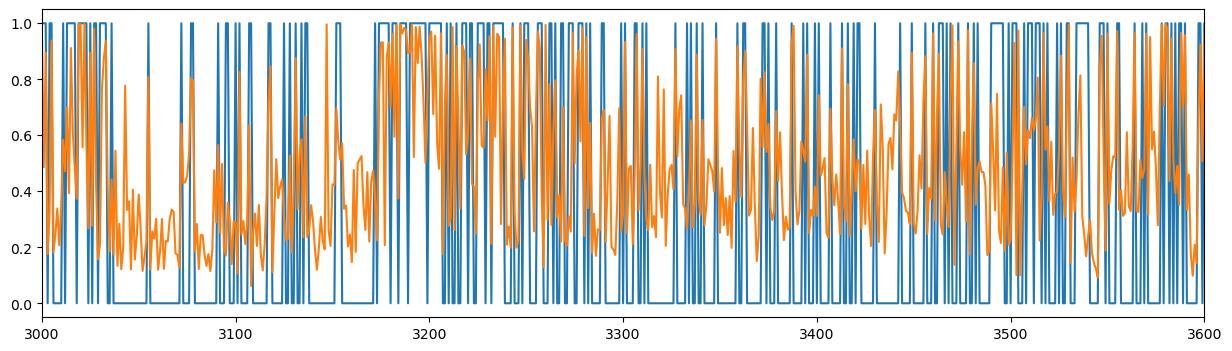

In [131]:
import matplotlib.pyplot as plt
arg_sort = np.argsort(filename)
arg_sort

plt.figure(figsize=(15,4))
x = 3000
plt.plot(labels[arg_sort])
plt.plot(outputs[arg_sort])
plt.xlim([0+x,600+x])

In [123]:
#%% Compute Evaluation Index
from evaluation_metrics import ComputeEvaluationMetrics, plot_PR_curve, plot_ROC_curve, plot_DET_curve, plot_COST_curve, plot_4_curves

Recall, Precision, FP_rate, TP_rate, FN_rate, NormalizedExpectedCost, ProbabilityCost, threshold_array = ComputeEvaluationMetrics(LabelsList, labels, outputs)
    

In [124]:
savepath = 'F:\PhD\OSMOSE_TYPE_v2' + os.sep + 'analysis\AI\Task_Glider_PBW_AnnotatorAnalysis' + os.sep + 'Comp_BM_curves'

#np.savez(savepath + os.sep + BM_Name_Model+'.npz', LabelsList, labels, outputs, filename)

In [125]:
import matplotlib.pyplot as plt

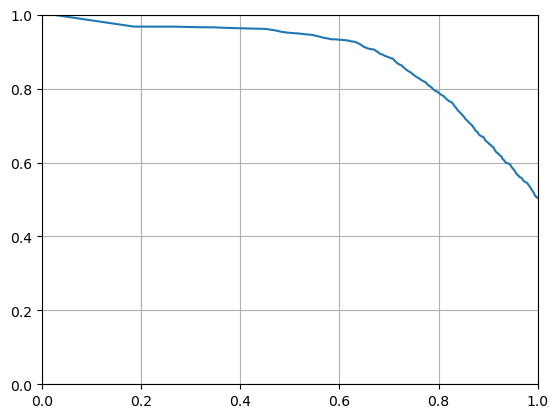

In [127]:
plt.plot(Recall, Precision)
plt.xlim([0,1])
plt.ylim([0,1])
plt.grid()

In [134]:
import sklearn
sklearn.metrics.auc(FP_rate, TP_rate)

0.8657642548900126

(0.0, 10.0)

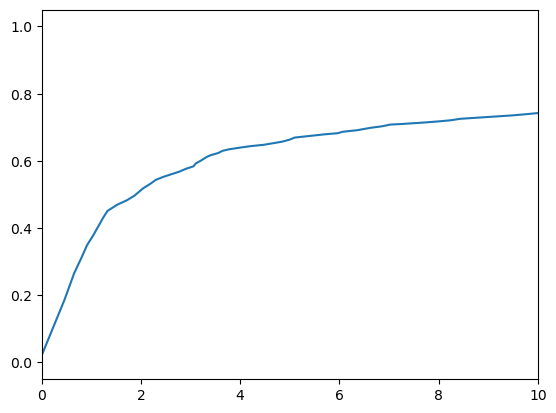

In [140]:
plt.plot(FP_rate * 72 , TP_rate) 
plt.xlim([0,10])

In [138]:
3600/50

72.0

In [36]:
BM_Name_Model

'BM_merged2_10'

Done
Applying model on evaluation set ...


100%|██████████| 30154/30154 [01:30<00:00, 334.75it/s]


Done
Applying model on evaluation set ...


100%|██████████| 30154/30154 [01:23<00:00, 360.08it/s]


Done
Applying model on evaluation set ...


100%|██████████| 30154/30154 [01:19<00:00, 378.05it/s]


Done
Applying model on evaluation set ...


100%|██████████| 30154/30154 [01:20<00:00, 374.89it/s]


Done
Applying model on evaluation set ...


100%|██████████| 30154/30154 [01:19<00:00, 380.62it/s]


Done
Applying model on evaluation set ...


100%|██████████| 30154/30154 [01:18<00:00, 383.27it/s]


Done
Applying model on evaluation set ...


100%|██████████| 30154/30154 [01:19<00:00, 377.76it/s]


Done
Applying model on evaluation set ...


100%|██████████| 30154/30154 [01:20<00:00, 375.15it/s]


Done
Applying model on evaluation set ...


100%|██████████| 30154/30154 [01:19<00:00, 381.07it/s]


Done
Applying model on evaluation set ...


100%|██████████| 30154/30154 [01:19<00:00, 377.63it/s]


Done
Applying model on evaluation set ...


100%|██████████| 30154/30154 [01:20<00:00, 375.88it/s]


Done
Applying model on evaluation set ...


100%|██████████| 30154/30154 [01:19<00:00, 376.98it/s]


Done
Applying model on evaluation set ...


100%|██████████| 30154/30154 [01:20<00:00, 376.54it/s]


Done
Applying model on evaluation set ...


100%|██████████| 30154/30154 [01:20<00:00, 376.60it/s]


Done
Applying model on evaluation set ...


100%|██████████| 30154/30154 [01:19<00:00, 380.38it/s]


Done
Applying model on evaluation set ...


100%|██████████| 30154/30154 [01:18<00:00, 382.43it/s]


Done
Applying model on evaluation set ...


100%|██████████| 30154/30154 [01:37<00:00, 310.14it/s]


Done
Applying model on evaluation set ...


100%|██████████| 30154/30154 [01:35<00:00, 316.68it/s]


Done
Applying model on evaluation set ...


100%|██████████| 30154/30154 [01:32<00:00, 326.55it/s]


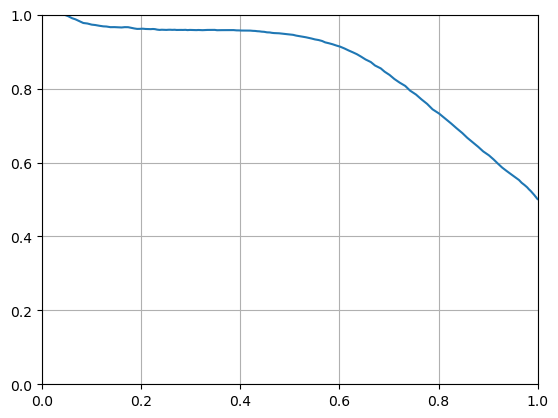

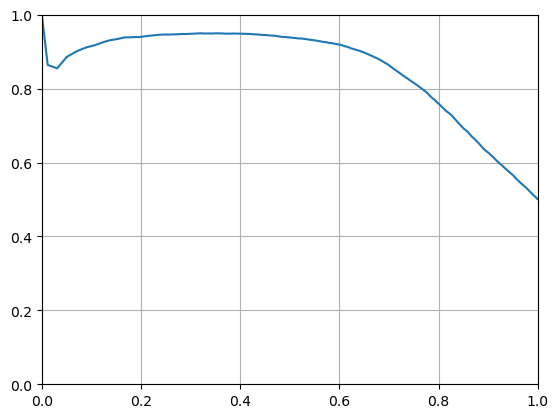

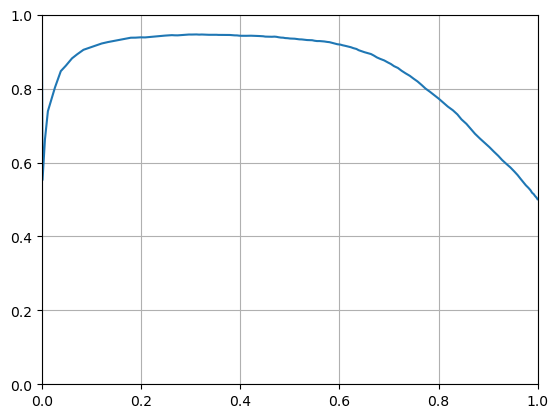

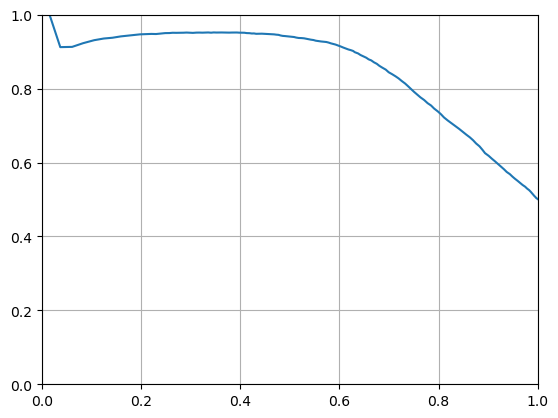

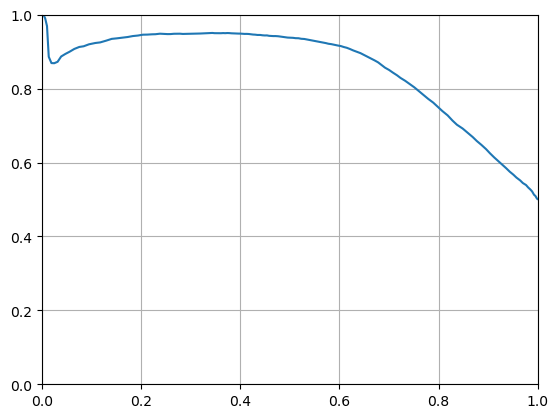

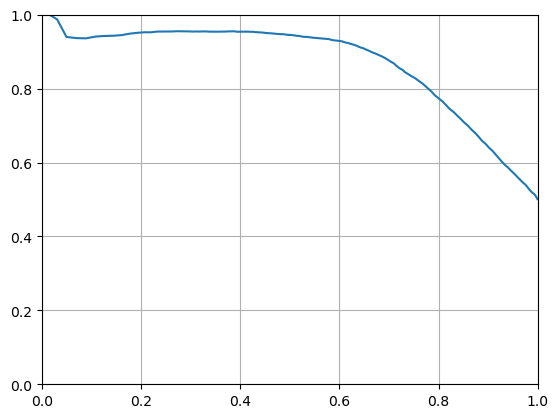

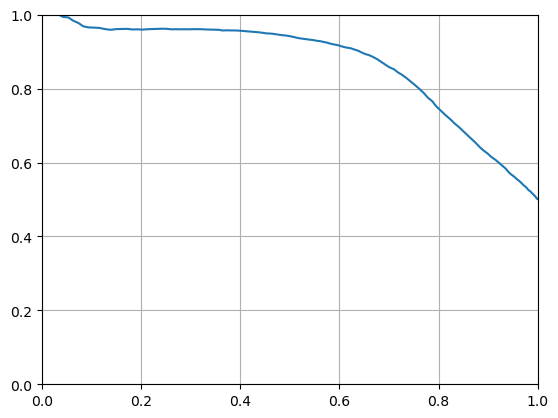

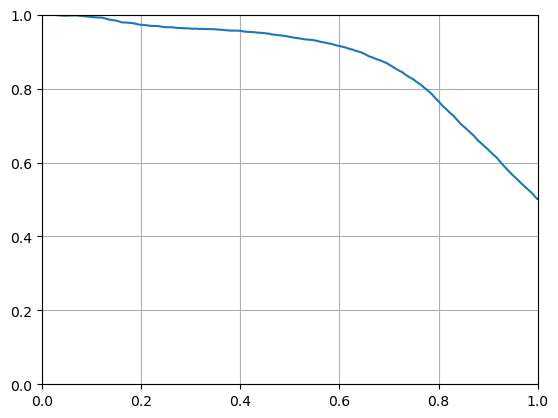

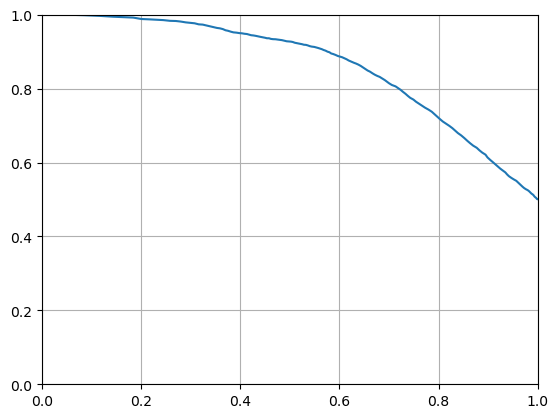

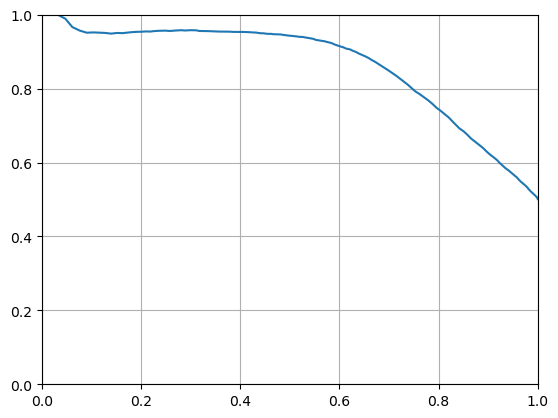

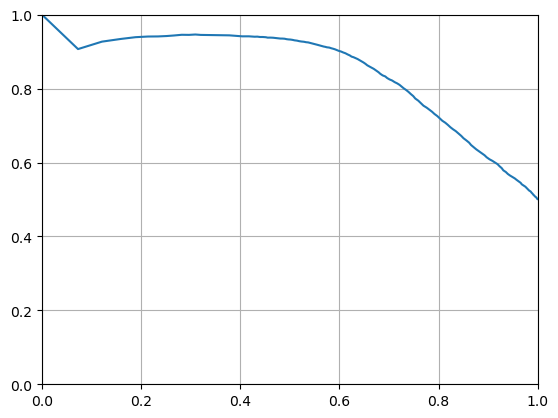

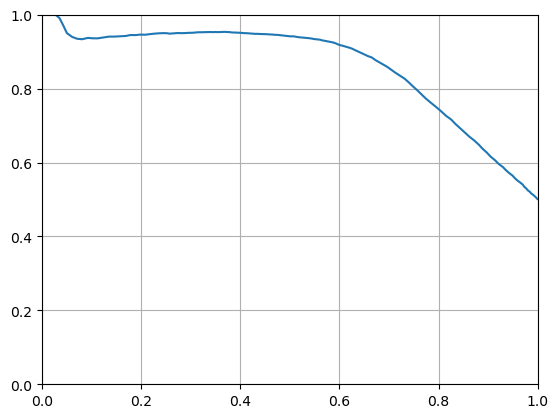

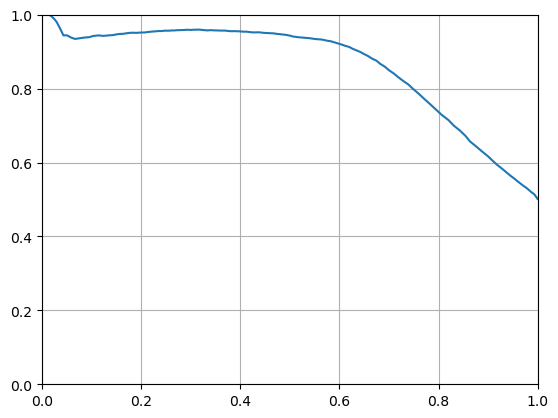

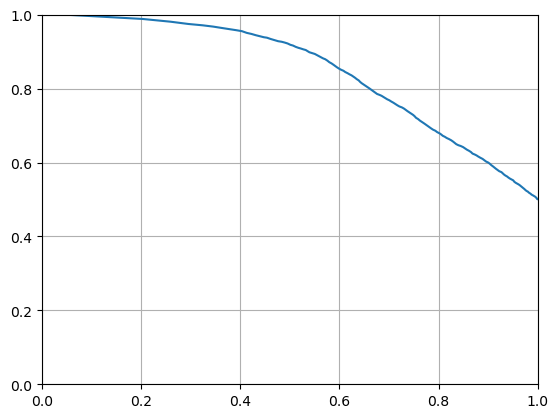

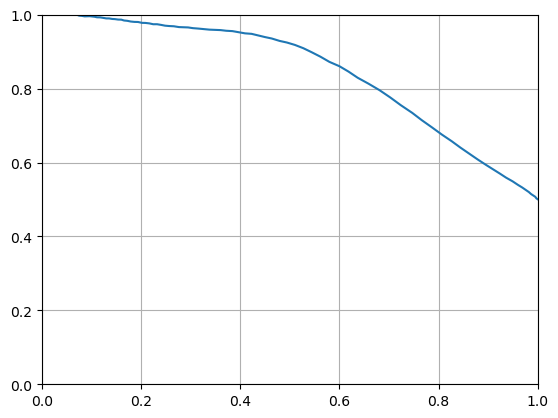

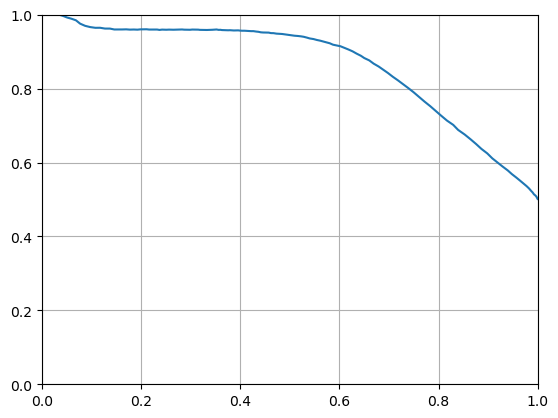

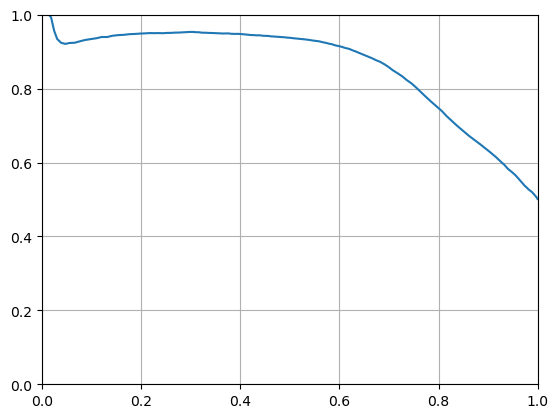

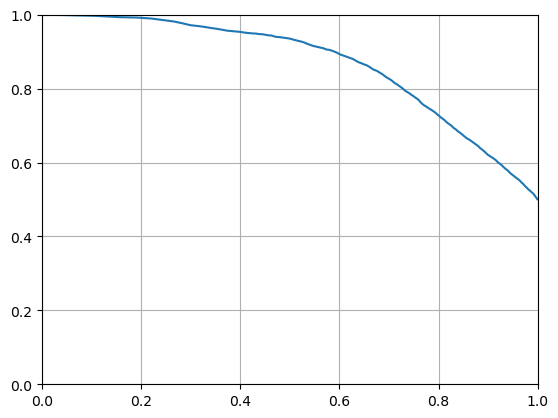

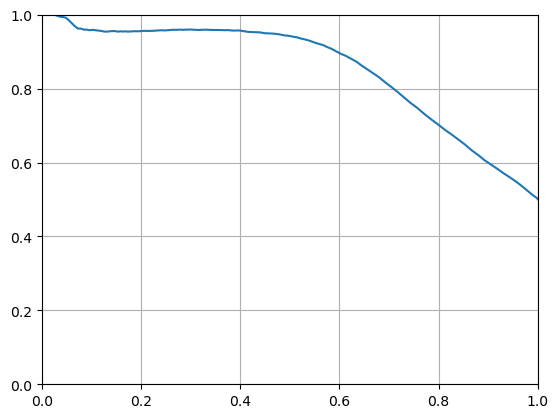

In [12]:
#%% Compute Evaluation Index
from evaluation_metrics import ComputeEvaluationMetrics, plot_PR_curve, plot_ROC_curve, plot_DET_curve, plot_COST_curve, plot_4_curves
import matplotlib.pyplot as plt
AN_list = ['Nassau', 'Shanghai', 'Civitavecchia', 'Galveston', 'Venice', 'Fukuoka', 'Naples', 'Bridgetown', 'Valletta', 'Rostock', 'Dubrovnik', 'Mahahual', 'Ensenada', 'Tunis', 'Funchal', 'Tallinn','Malaga', 'Helsinki', 'Valencia']

id_ep = [30,50,30,50,30,40,55,40,30,55,51,25,40,55,25,35,30,55,55]

for i in range(len(AN_list)):
    Task_ID_Model = 'Task_Glider_PBW_AnnotatorAnalysis'
    BM_Name_Model = 'BM_AN_'+AN_list[i]
    Version_name_Model = 'm1'
        
    ID_epoch_for_evaluation = id_ep[i]
    set_epoch(Task_ID_Model, BM_Name_Model, Version_name_Model, ID_epoch_for_evaluation)
    parameters_Model = load_model_hyperparameters(Task_ID_Model, BM_Name_Model, Version_name_Model)
    parameters_Evaluation = {'input_data_format':input_data_format, 'nfft':nfft, 'window_size':window_size, 'overlap':overlap, 'dynamic_min':dynamic_min, 'dynamic_max':dynamic_max, 'scaling':scaling,}
    LabelsList, labels, outputs, filename = apply_model_on_new_format_dataset_main(Task_ID_Model, BM_Name_Model, Version_name_Model, parameters_Model, Task_ID_Evaluation, BM_Name_Evaluation, SplitName_Evaluation, parameters_Evaluation)

    Recall, Precision, FP_rate, TP_rate, FN_rate, NormalizedExpectedCost, ProbabilityCost, threshold_array = ComputeEvaluationMetrics(LabelsList, labels, outputs)
    savepath = 'F:\PhD\OSMOSE_TYPE_v2' + os.sep + 'analysis\AI\Task_Glider_PBW_AnnotatorAnalysis' + os.sep + 'Comp_BM_curves'

    np.savez(savepath + os.sep + BM_Name_Model+'.npz', LabelsList, labels, outputs, filename)
    plt.figure()
    plt.plot(Recall, Precision)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.grid()